<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_One/blob/master/Schwefel_222_jun_25_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Schwefel_222
# In the paper Ngen=2000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 180 (delta 22), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (180/180), 570.59 KiB | 818.00 KiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/Raianars_paper_One


In [ ]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel_222'
Fun=Function.Schwefel_222

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE)
#p=int(p/2) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS




In [ ]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      Menorf=np.argmin(Fitnessf)

      X[Maior,:]=np.copy(Xf[Menorf,:])
      Xf[Maiorf,:]=np.copy(X[Menor,:])
      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
pd.set_option('display.max_columns', 30)  
print(df)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0           3.990618     0.991316      0.01         1.0      0.0  150.0   
1           3.896756     0.967999      0.02         1.0      0.0  150.0   
2           3.828072     0.950937      0.03         1.0      2.0  150.0   
3           3.745714     0.930479      0.04         1.0      0.0  150.0   
4           3.685346     0.915483      0.05         1.0      0.0  150.0   
..               ...          ...       ...         ...      ...    ...   
95          1.109607     0.275639      0.96         1.0      2.0  150.0   
96          1.102682     0.273919      0.97         1.0      2.0  150.0   
97          1.091162     0.271057      0.98         1.0      2.0  150.0   
98          1.076953     0.267528      0.99         1.0      2.0  150.0   
99          1.065510     0.264685      1.00         1.0      0.0  150.0   

          Fo       CRo       fmin        fmax  AD_fmin  AD_fmax  DELTA FOBJ  \
0   0.500000  0.5000

Text(0, 0.5, 'CR')

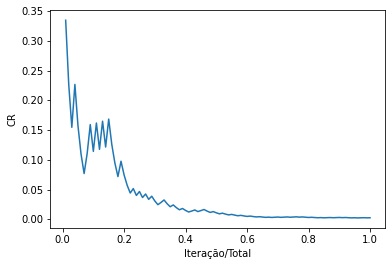

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

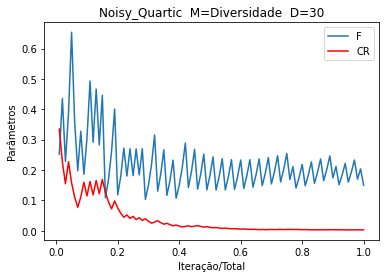

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=30')

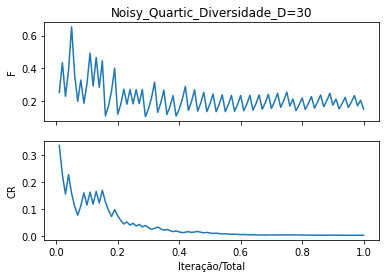

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 15000 Iterações= 100 Dim= 30 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-100 

MÉDIA:  0.2803074963349939
MIN __: 0.1598831952895209
MAX__:  0.36066729939654213
STD __: 0.059186063485057006
Tempo Médio= 18.840 segundos ---
10 Rodadas

BEST:  [ 0.05863682  0.07141405 -0.17361668 -0.1018482  -0.20820159 -0.19256714
  0.05640042  0.13916693  0.11396913 -0.15570418 -0.07232488  0.06532335
 -0.06914776 -0.10643147 -0.03181436  0.0926861  -0.02101298 -0.04854653
 -0.16140771  0.18947445  0.10687338 -0.11927493 -0.00332967 -0.09371396
 -0.15663548 -0.05759094 -0.07398403  0.14599578  0.10914855 -0.01437822
  0.1598832 ]
